In [221]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
# read data
train = pd.read_csv("train.csv", index_col = 'Id')
test  = pd.read_csv("test.csv", index_col = 'Id')

In [223]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [224]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [225]:
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [226]:
train.shape

(1460, 80)

### Exploratory Data Analysis

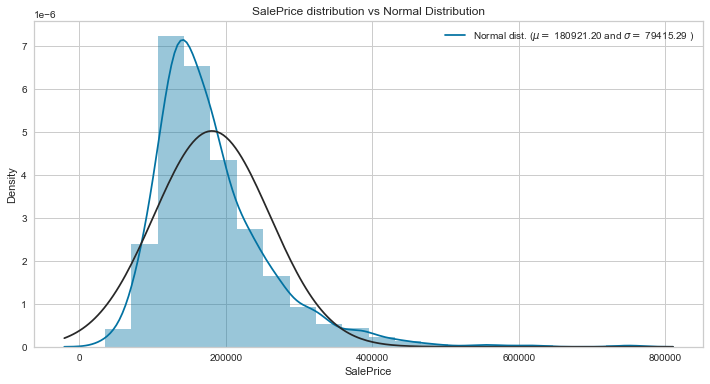

In [227]:
# Get the main parameters of the Normal Ditribution ()
from scipy.stats import norm
mu, sigma = norm.fit(train.SalePrice)

# Plot the distribution of SalePrice (look like a right-skewed distribution)
plt.figure(figsize = (12,6))
plt.title('SalePrice distribution vs Normal Distribution', fontsize = 12)
sns.distplot(train.SalePrice, bins=20, fit = norm) 
plt.xlabel('SalePrice')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')

In [228]:
# Evaluate the p-value if the data follows the normal distribution (result shows obviously not)
from scipy.stats import shapiro

print(shapiro(train.SalePrice))

### The first output is the test statistic, the second is the p-value
### If the p-Value (the second value) is larger than 0.05, a normal distribution is assumed
### The Shapiro Wilk test is better for data size < 5000

ShapiroResult(statistic=0.869671642780304, pvalue=3.206247534576162e-33)


<AxesSubplot:>

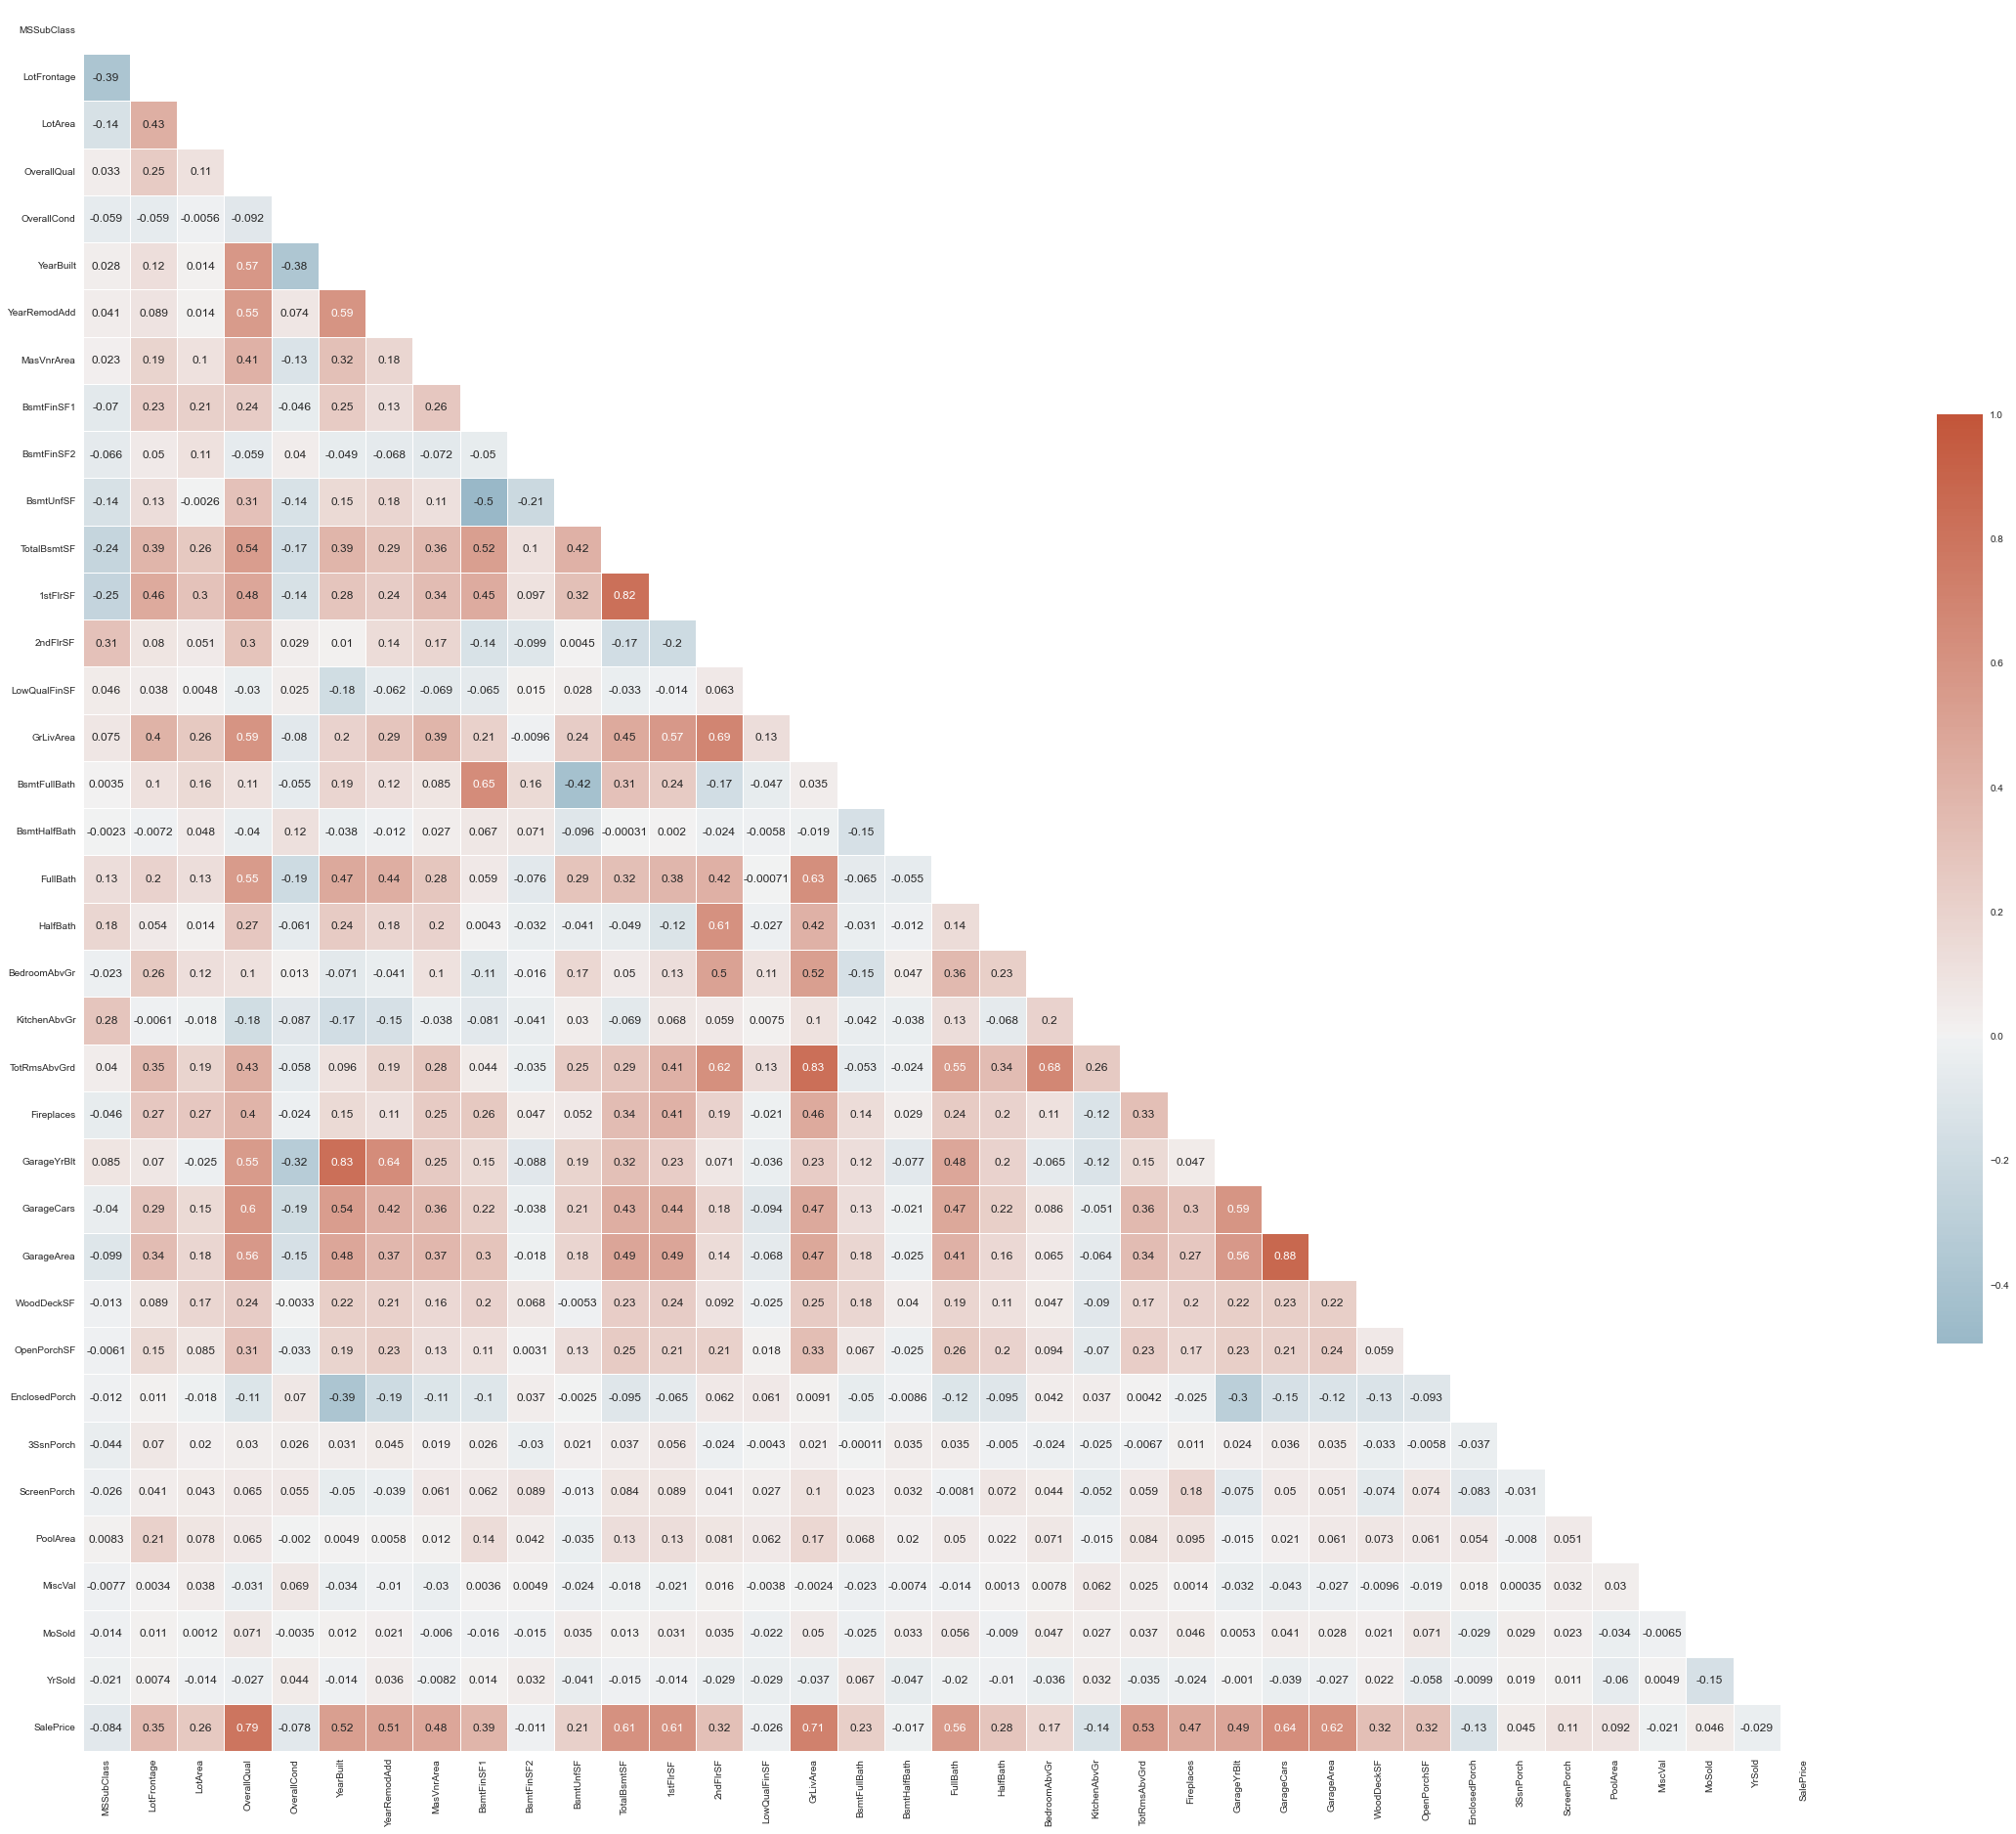

In [229]:
# Construct a correlation matrix

fig, ax = plt.subplots(figsize=(40, 35))
mat = train.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))       # Return upper triangle of an array.
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [230]:
# See which features correlates most with the target variable, they have the potentials to be investigated in depth
corr_rank = mat['SalePrice'].sort_values(ascending = False)
corr_rank

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'FullBath vs SalePrice')

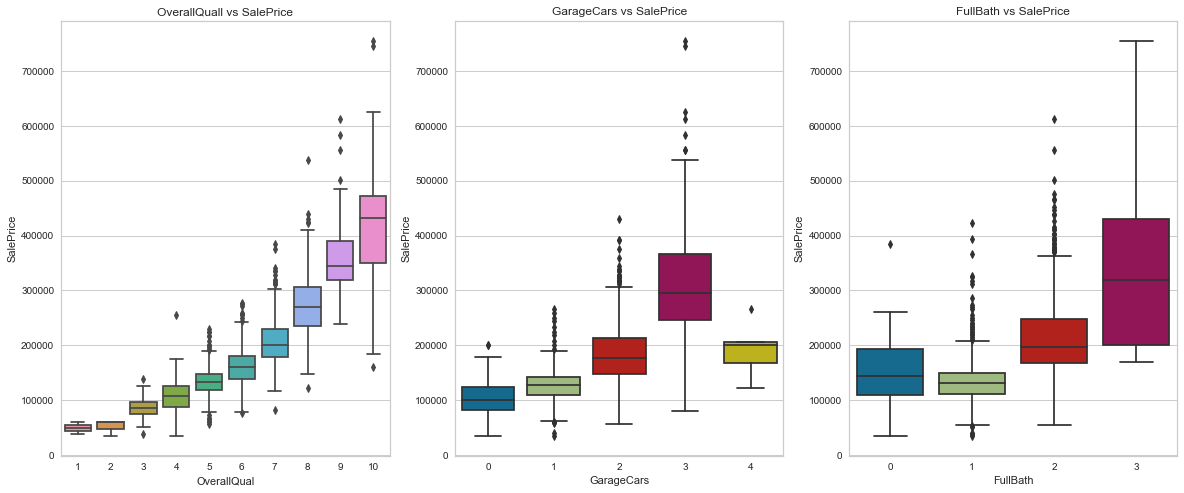

In [231]:
# Plot the relationship between OverallQuall and SalePrice [Pearson = 0.79] and
#                       between GarageCars and SalePrice [Pearson = 0.64] and
#                       between FullBath and SalePrice [Pearson = 0.56]
 
figure, ax = plt.subplots(1,3, figsize = (20,8))
sns.boxplot(data=train, x = corr_rank.index[1], y='SalePrice', ax = ax[0]).set_title('OverallQuall vs SalePrice', fontsize = 12)
sns.boxplot(data=train, x = corr_rank.index[3], y='SalePrice', ax = ax[1]).set_title('GarageCars vs SalePrice', fontsize = 12) # The second and the other variables are not plotted simply because the visualization is not good in this bar plot, but better in the below regression plot
sns.boxplot(data=train, x = corr_rank.index[7], y='SalePrice', ax = ax[2]).set_title('FullBath vs SalePrice', fontsize = 12)

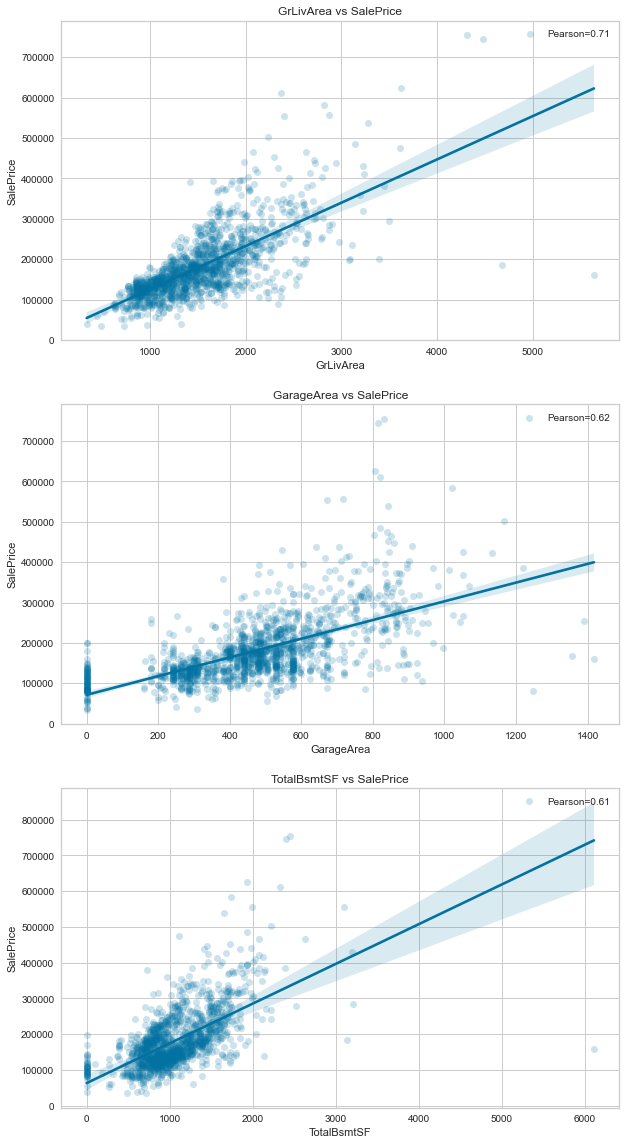

In [232]:
# Plot the relationship between GrLivArea and SalePrice [Pearson = 0.71]
# Plot the relationship between GarageArea and SalePrice [Pearson = 0.62]
# Plot the relationship between TotalBsmtSF and SalePrice [Pearson = 0.61]

figure, ax = plt.subplots(3,1, figsize = (10,20))
sns.regplot(data=train, x = corr_rank.index[2], y='SalePrice', scatter_kws={'alpha':0.2}, ax = ax[0], label =f'Pearson={corr_rank[2]:.2f}').set_title('GrLivArea vs SalePrice', fontsize = 12)
sns.regplot(data=train, x = corr_rank.index[4], y='SalePrice', scatter_kws={'alpha':0.2}, ax = ax[1], label =f'Pearson={corr_rank[4]:.2f}').set_title('GarageArea vs SalePrice', fontsize = 12)
sns.regplot(data=train, x = corr_rank.index[5], y='SalePrice', scatter_kws={'alpha':0.2}, ax = ax[2], label =f'Pearson={corr_rank[5]:.2f}').set_title('TotalBsmtSF vs SalePrice', fontsize = 12)

ax[0].legend(loc = 'best')
ax[1].legend(loc = 'best')
ax[2].legend(loc = 'best')

Text(0, 0.5, 'Median of Price in $')

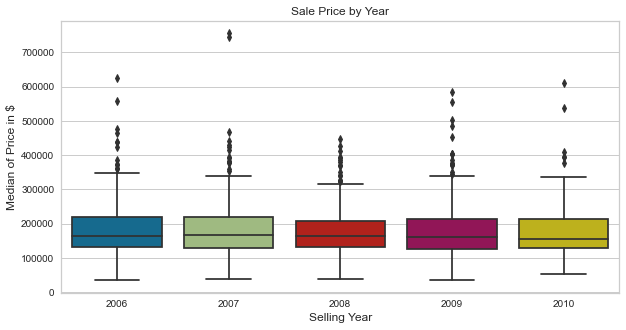

In [233]:
# Visulaize the SalePrice by Year (result shows that 95% of the SalePrice distribution are almost the same for each year)

plt.figure(figsize = (10,5))
sns.boxplot(x='YrSold', y="SalePrice", data = train)
plt.title('Sale Price by Year', fontsize = 12)
plt.xlabel('Selling Year', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)

### Data processing

In [234]:
X = train.copy()
X.dropna(axis=0, subset=['SalePrice'], inplace=True) # Drop the row if SalePrice in train dataset is missing value

# Save the target variable as y
y = X.SalePrice

X_test = test.copy()

In [235]:
# Concatenating train & test set
train_test = pd.concat([X,X_test], axis=0, sort=False)

In [236]:
# See if there exists duplicated row
train_test.duplicated().sum()

0

In [237]:
# Drop the SalePrice row
train_test.drop('SalePrice', axis = 1, inplace = True)

In [238]:
# Get the number of missing data points per column
missing_values_count = train_test.isnull().sum()
missing_values_count

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

In [239]:
# Calculate how many total missing values in the dataset
total_cells = np.product(train_test.shape)
total_missing = missing_values_count.sum()

# Percent of data that is missing (about 6% missing data)
percent_missing = (total_missing/total_cells)
print(f'The missing values consist of {percent_missing:.3f}% of total data.')

The missing values consist of 0.061% of total data.


In [240]:
missing_cols = train_test[train_test.columns[missing_values_count>0]]
missing_cols.head(10)

MSZoning  LotFrontage Alley Utilities Exterior1st Exterior2nd MasVnrType  \
Id                                                                            
1        RL         65.0   NaN    AllPub     VinylSd     VinylSd    BrkFace   
2        RL         80.0   NaN    AllPub     MetalSd     MetalSd       None   
3        RL         68.0   NaN    AllPub     VinylSd     VinylSd    BrkFace   
4        RL         60.0   NaN    AllPub     Wd Sdng     Wd Shng       None   
5        RL         84.0   NaN    AllPub     VinylSd     VinylSd    BrkFace   
6        RL         85.0   NaN    AllPub     VinylSd     VinylSd       None   
7        RL         75.0   NaN    AllPub     VinylSd     VinylSd      Stone   
8        RL          NaN   NaN    AllPub     HdBoard     HdBoard      Stone   
9        RM         51.0   NaN    AllPub     BrkFace     Wd Shng       None   
10       RL         50.0   NaN    AllPub     MetalSd     MetalSd       None   

    MasVnrArea BsmtQual BsmtCond  ... GarageYrBlt GarageFinish  GarageCars  \
Id                                ...                                        
1        196.0       Gd       TA  ...      2003.0          RFn         2.0   
2          0.0       Gd       TA  ...      1976.0          RFn         2.0   
3        162.0       Gd       TA  ...      2001.0          RFn         2.0   
4          0.0       TA       Gd  ...      1998.0          Unf         3.0   
5        350.0       Gd       TA  ...      2000.0          RFn         3.0   
6          0.0       Gd       TA  ...      1993.0          Unf         2.0   
7        186.0       Ex       TA  ...      2004.0          RFn         2.0   
8        240.0       Gd       TA  ...      1973.0          RFn         2.0   
9          0.0       TA       TA  ...      1931.0          Unf         2.0   
10         0.0       TA       TA  ...      1939.0          RFn         1.0   

   GarageArea  GarageQual  GarageCond  PoolQC  Fence  MiscFeature  SaleType  
Id                                                                           
1       548.0          TA          TA     NaN    NaN          NaN        WD  
2       460.0          TA          TA     NaN    NaN          NaN        WD  
3       608.0          TA          TA     NaN    NaN          NaN        WD  
4       642.0          TA          TA     NaN    NaN          NaN        WD  
5       836.0          TA          TA     NaN    NaN          NaN        WD  
6       480.0          TA          TA     NaN  MnPrv         Shed        WD  
7       636.0          TA          TA     NaN    NaN          NaN        WD  
8       484.0          TA          TA     NaN    NaN         Shed        WD  
9       468.0          Fa          TA     NaN    NaN          NaN        WD  
10      205.0          Gd          TA     NaN    NaN          NaN        WD  

[10 rows x 34 columns]

In [241]:
missing_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      2915 non-null   object 
 1   LotFrontage   2433 non-null   float64
 2   Alley         198 non-null    object 
 3   Utilities     2917 non-null   object 
 4   Exterior1st   2918 non-null   object 
 5   Exterior2nd   2918 non-null   object 
 6   MasVnrType    2895 non-null   object 
 7   MasVnrArea    2896 non-null   float64
 8   BsmtQual      2838 non-null   object 
 9   BsmtCond      2837 non-null   object 
 10  BsmtExposure  2837 non-null   object 
 11  BsmtFinType1  2840 non-null   object 
 12  BsmtFinSF1    2918 non-null   float64
 13  BsmtFinType2  2839 non-null   object 
 14  BsmtFinSF2    2918 non-null   float64
 15  BsmtUnfSF     2918 non-null   float64
 16  TotalBsmtSF   2918 non-null   float64
 17  Electrical    2918 non-null   object 
 18  BsmtFullBath  2917 non-null 

In [242]:
missing_cols.isna().sum().sort_values()

TotalBsmtSF        1
GarageArea         1
GarageCars         1
KitchenQual        1
Electrical         1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
Exterior1st        1
Exterior2nd        1
Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        23
MasVnrType        24
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtCond          82
BsmtExposure      82
GarageType       157
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
LotFrontage      486
FireplaceQu     1420
Fence           2348
Alley           2721
MiscFeature     2814
PoolQC          2909
dtype: int64

Text(0, 0.5, '% of Missing Data')

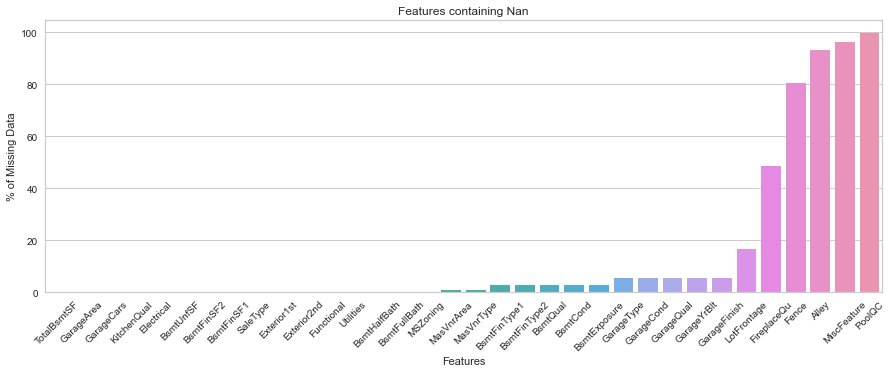

In [243]:
# Plot features that contain missing values
missing_cols_sum = missing_cols.isna().sum().sort_values()
plt.figure(figsize = (15,5))
sns.barplot(x = missing_cols_sum.index, y = missing_cols_sum/missing_cols.shape[0]*100)
plt.xticks(rotation=45)
plt.title('Features containing Nan')
plt.xlabel('Features')
plt.ylabel('% of Missing Data')


In [244]:
# Drop the columns if there are less than 80% valid data values
# Not consider to drop the row containing missing values because only 7 row contains the feature 'PoolQC', while the others don't
train_test.dropna(axis = 'columns', thresh = train.shape[0]*0.8)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                            
1             60       RL         65.0     8450   Pave      Reg         Lvl   
2             20       RL         80.0     9600   Pave      Reg         Lvl   
3             60       RL         68.0    11250   Pave      IR1         Lvl   
4             70       RL         60.0     9550   Pave      IR1         Lvl   
5             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
2915         160       RM         21.0     1936   Pave      Reg         Lvl   
2916         160       RM         21.0     1894   Pave      Reg         Lvl   
2917          20       RL        160.0    20000   Pave      Reg         Lvl   
2918          85       RL         62.0    10441   Pave      Reg         Lvl   
2919          60       RL         74.0     9627   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
Id                                  ...                                       
1       AllPub    Inside       Gtl  ...          61             0         0   
2       AllPub       FR2       Gtl  ...           0             0         0   
3       AllPub    Inside       Gtl  ...          42             0         0   
4       AllPub    Corner       Gtl  ...          35           272         0   
5       AllPub       FR2       Gtl  ...          84             0         0   
...        ...       ...       ...  ...         ...           ...       ...   
2915    AllPub    Inside       Gtl  ...           0             0         0   
2916    AllPub    Inside       Gtl  ...          24             0         0   
2917    AllPub    Inside       Gtl  ...           0             0         0   
2918    AllPub    Inside       Gtl  ...          32             0         0   
2919    AllPub    Inside       Mod  ...          48             0         0   

     ScreenPorch PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition  
Id                                                                          
1              0        0        0       2    2008        WD        Normal  
2              0        0        0       5    2007        WD        Normal  
3              0        0        0       9    2008        WD        Normal  
4              0        0        0       2    2006        WD       Abnorml  
5              0        0        0      12    2008        WD        Normal  
...          ...      ...      ...     ...     ...       ...           ...  
2915           0        0        0       6    2006        WD        Normal  
2916           0        0        0       4    2006        WD       Abnorml  
2917           0        0        0       9    2006        WD       Abnorml  
2918           0        0      700       7    2006        WD        Normal  
2919           0        0        0      11    2006        WD        Normal  

[2919 rows x 75 columns]

In [245]:
# Fill Categorical NaN by imputation (That we know how to fill due to the description file )
# These missing data are not missing, but reflect the absence of something
train_test['Functional'] = train_test['Functional'].fillna('Typ')
train_test['Electrical'] = train_test['Electrical'].fillna("SBrkr")
train_test['KitchenQual'] = train_test['KitchenQual'].fillna("TA")
train_test['Exterior1st'] = train_test['Exterior1st'].fillna(train_test['Exterior1st'].mode()[0])
train_test['Exterior2nd'] = train_test['Exterior2nd'].fillna(train_test['Exterior2nd'].mode()[0])
train_test['SaleType'] = train_test['SaleType'].fillna(train_test['SaleType'].mode()[0])

for col in ['PoolQC', 'Alley', 'FireplaceQu', 'Fence', 'MiscFeature', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    train_test[col] = train_test[col].fillna("None")

for col in ('GarageArea', 'GarageCars'):
    train_test[col] = train_test[col].fillna(0)

In [246]:
# Check the features with NaN remained out
train_test[train_test.columns[train_test.isna().sum()>0]].isna().sum().sort_values()

BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Utilities         2
BsmtFullBath      2
BsmtHalfBath      2
MSZoning          4
MasVnrArea       23
MasVnrType       24
GarageYrBlt     159
LotFrontage     486
dtype: int64

In [247]:
# Remove the useless variables
train_test = train_test.drop(['GarageYrBlt','YearRemodAdd'] , axis = 1)

In [248]:
# Impute the numerical missing values with KnnRegressor (other different Imputers can be used too)
for col in ('MSSubClass', 'MoSold'):
    train_test[col] = train_test[col].apply(str)
    
from sklearn.neighbors import KNeighborsRegressor
def impute_knn(df, n_neighbors):
    ttn = df.select_dtypes(include=[np.number])
    ttc = df.select_dtypes(exclude=[np.number])

    cols_nan = ttn.columns[ttn.isna().any()].tolist()         # columns w/ nan 
    cols_no_nan = ttn.columns.difference(cols_nan).values     # columns w/n nan

    for col in cols_nan:
        imp_test = ttn[ttn[col].isna()]   # indicies which have missing data will become our test set
        imp_train = ttn.dropna()          # all indicies which which have no missing data 
        model = KNeighborsRegressor(n_neighbors=n_neighbors)  # KNR Unsupervised Approach
        knr = model.fit(imp_train[cols_no_nan], imp_train[col]) # Using the columns w/n nan to predict the columns w/ nan value, in a free-nan dataset
        ttn.loc[ttn[col].isna(), col] = knr.predict(imp_test[cols_no_nan])
    
    return pd.concat([ttn,ttc],axis=1)

imputed_train_test = impute_knn(train_test, n_neighbors = 5)

In [249]:
# Check again the (categorical) features with NaN remained out
imputed_train_test[imputed_train_test.columns[imputed_train_test.isna().sum()>0]].isna().sum().sort_values()

Utilities      2
MSZoning       4
MasVnrType    24
dtype: int64

In [250]:
#  Check the type of data that these columns contain
imputed_train_test.columns[imputed_train_test.isna().sum()>0].dtype == 'object'

True

In [251]:
# Impute 'None' to these catogorical missing values 
imputed_train_test.update(imputed_train_test[imputed_train_test.columns[imputed_train_test.isna().sum()>0]].fillna('None'))

In [252]:
# Check again the features with NaN remained out (no missing value left this time!)
imputed_train_test[imputed_train_test.columns[imputed_train_test.isna().sum()>0]].isna().sum().sort_values()

Series([], dtype: float64)

In [253]:
imputed_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    2919 non-null   float64
 1   LotArea        2919 non-null   int64  
 2   OverallQual    2919 non-null   int64  
 3   OverallCond    2919 non-null   int64  
 4   YearBuilt      2919 non-null   int64  
 5   MasVnrArea     2919 non-null   float64
 6   BsmtFinSF1     2919 non-null   float64
 7   BsmtFinSF2     2919 non-null   float64
 8   BsmtUnfSF      2919 non-null   float64
 9   TotalBsmtSF    2919 non-null   float64
 10  1stFlrSF       2919 non-null   int64  
 11  2ndFlrSF       2919 non-null   int64  
 12  LowQualFinSF   2919 non-null   int64  
 13  GrLivArea      2919 non-null   int64  
 14  BsmtFullBath   2919 non-null   float64
 15  BsmtHalfBath   2919 non-null   float64
 16  FullBath       2919 non-null   int64  
 17  HalfBath       2919 non-null   int64  
 18  BedroomA

### Feature Engineering

- Create some new features combining the ones that have already existed. These could help to increase the performance of the model

In [254]:
imputed_train_test['Total_Home_Quality'] = imputed_train_test['OverallQual'] + imputed_train_test['OverallCond']

imputed_train_test['Total_Bathrooms'] = (imputed_train_test['FullBath'] + (0.5 * imputed_train_test['HalfBath']) +
                               imputed_train_test['BsmtFullBath'] + (0.5 * imputed_train_test['BsmtHalfBath']))

imputed_train_test["HighQualSF"] = imputed_train_test["GrLivArea"]+imputed_train_test["1stFlrSF"] + imputed_train_test["2ndFlrSF"]+0.5*imputed_train_test["GarageArea"]+0.5*imputed_train_test["TotalBsmtSF"]+1*imputed_train_test["MasVnrArea"]

imputed_train_test["Age"] = pd.to_numeric(imputed_train_test["YrSold"])-pd.to_numeric(imputed_train_test["YearBuilt"])

In [255]:
# Creating dummy variables from categorical features
train_test_dummy = pd.get_dummies(imputed_train_test)

# Fetch all numeric features
# Extract all highly skewed (skew > 0.5) features
from scipy.stats import skew

#numeric_features = train_test_dummy.dtypes[train_test_dummy.dtypes != object].index
skewed_features = train_test_dummy.apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index

# Normalize highly skewed features using log_transformation, log(1+x)
for i in skew_index:
    train_test_dummy[i] = np.log1p(train_test_dummy[i])

In [256]:
train_test_dummy.describe().T

count         mean        std          min  \
LotFrontage            2919.0     4.209821   0.341051     3.091042   
LotArea                2919.0     9.094915   0.509882     7.170888   
OverallQual            2919.0     6.089072   1.409947     1.000000   
OverallCond            2919.0     1.867152   0.173171     0.693147   
YearBuilt              2919.0  1971.312778  30.291442  1872.000000   
...                       ...          ...        ...          ...   
SaleCondition_AdjLand  2919.0     0.002850   0.044373     0.000000   
SaleCondition_Alloca   2919.0     0.005699   0.062561     0.000000   
SaleCondition_Family   2919.0     0.010918   0.086365     0.000000   
SaleCondition_Normal   2919.0     0.822885   0.381832     0.000000   
SaleCondition_Partial  2919.0     0.058167   0.192261     0.000000   

                               25%          50%          75%          max  
LotFrontage               4.110874     4.262680     4.394449     5.749393  
LotArea                   8.919854     9.154193     9.356257    12.279537  
OverallQual               5.000000     6.000000     7.000000    10.000000  
OverallCond               1.791759     1.791759     1.945910     2.302585  
YearBuilt              1953.500000  1973.000000  2001.000000  2010.000000  
...                            ...          ...          ...          ...  
SaleCondition_AdjLand     0.000000     0.000000     0.000000     0.693359  
SaleCondition_Alloca      0.000000     0.000000     0.000000     0.693359  
SaleCondition_Family      0.000000     0.000000     0.000000     0.693359  
SaleCondition_Normal      1.000000     1.000000     1.000000     1.000000  
SaleCondition_Partial     0.000000     0.000000     0.000000     0.693359  

[332 rows x 8 columns]

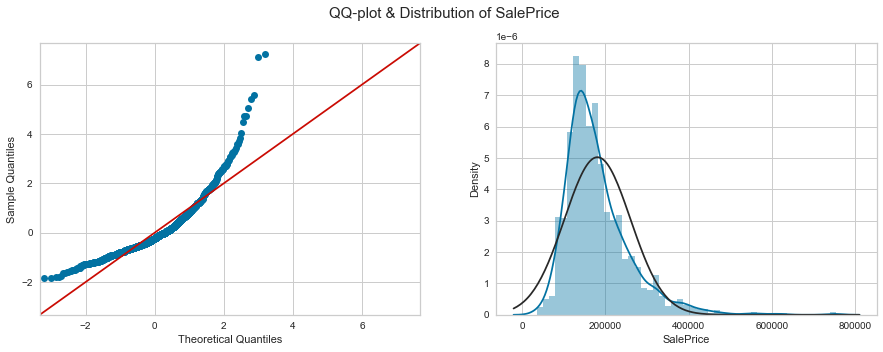

In [257]:
# Tranform the target distribution into a normal one with a log-transformation

# SalePrice before transformation
import statsmodels.api as sm
from scipy import stats
from scipy.stats import skew
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("QQ-plot & Distribution of SalePrice", fontsize= 15)

sm.qqplot(y, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0]) # QQ plot with the theoretic t-distribition

sns.distplot(y, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

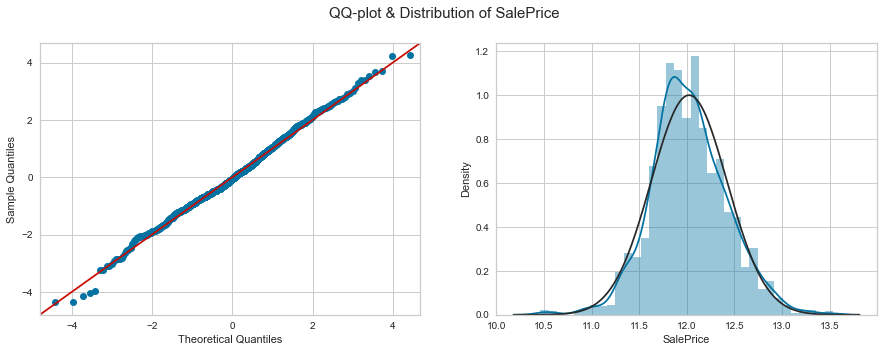

In [258]:
# SalePrice after transformation

y_log = np.log1p(y)

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("QQ-plot & Distribution of SalePrice", fontsize= 15)

sm.qqplot(y_log, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(y_log, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

### Build Model by PyCaret

- documentation: https://pycaret.readthedocs.io/en/latest/api/regression.html

In [259]:
import pycaret
from pycaret.utils import enable_colab
# enable_colab()
print('PyCaret: %s' % pycaret.__version__)

PyCaret: 2.3.10


In [260]:
# print(train.shape)
# print(y_log.shape)
# print(test.shape)
print(train_test_dummy.shape)

(2919, 332)


In [261]:
new_train = train_test_dummy[0:1460]
new_test = train_test_dummy[1460:]

new_train = pd.concat([new_train, y_log], axis = 1)
print(new_train.shape)
print(new_test.shape)

(1460, 333)
(1459, 332)


In [321]:
# Set the dataset with the PyCaret library
from pycaret.regression import *

dataset = setup(data = new_train, target = 'SalePrice', train_size = 0.7, 
                remove_outliers= True, remove_multicollinearity = True, combine_rare_levels = True,
                ignore_low_variance = True,    
                preprocess = True,
                fold_shuffle = True, normalize = True, normalize_method = 'robust', silent = True, log_experiment = True)

# GPU is only enabled for CatBoost when data > 50,000 rows...

In [322]:
X_train_final = get_config(variable="X_train")
X_test_final = get_config(variable="X_test")
y_train_final = get_config(variable="y_train")
y_test_final = get_config(variable="y_test")

print(X_train_final.shape, X_test_final.shape)

(970, 163) (439, 163)


In [323]:
pd.set_option('display.max_columns', None)
X_train_final.head()

LotFrontage   LotArea  OverallCond  YearBuilt  MasVnrArea  BsmtFinSF1  \
Id                                                                           
42      1.659346  1.392869      1.00000  -0.304348    0.000000    0.142925   
425     0.093899 -0.124287      0.00000  -0.369565    0.852821    0.074473   
945     0.221123  1.002688      1.00000  -0.326087    1.243486   -0.184884   
971    -0.513127  0.314499     -1.18275  -0.521739    0.000000   -0.902062   
877     0.984287  2.361943      0.00000  -0.217391    0.000000    0.078604   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  BsmtFullBath  \
Id                                                                          
42     0.000000  -0.218211     0.629145  0.455677  0.000000           0.0   
425    0.000000   0.132104     0.381821  0.226936  0.000000           1.0   
945    5.872118  -0.284639    -0.391188  0.481845  0.000000           0.0   
971    0.000000   0.314735    -0.654120 -0.881542  0.932448           0.0   
877    0.000000  -0.118572     0.143047 -0.078397  0.000000           1.0   

     BsmtHalfBath  HalfBath  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  \
Id                                                                              
42       0.693147       1.0     -0.535837    0.584963        -1.0   -0.716667   
425      0.000000       0.0      0.000000    0.000000        -1.0   -0.762500   
945      0.693147       0.0      0.464163    0.000000         0.0    0.187500   
971      0.000000       1.0      0.000000   -1.000000        -2.0   -2.000000   
877      0.000000       0.0     -0.535837   -1.000000         0.0    0.700000   

     WoodDeckSF  OpenPorchSF  Total_Bathrooms  HighQualSF       Age  \
Id                                                                    
42          0.0     0.327462              0.0   -0.171555  0.170322   
425         0.0     0.128690              0.0   -0.359743  0.213674   
945         0.0     0.356824             -0.5    0.089094  0.203151   
971         0.0    -0.764331             -0.5   -0.724078  0.263478   
877         0.0    -0.764331              0.0   -0.567764  0.123276   

     MSSubClass_120  MSSubClass_20  MSSubClass_30  MSSubClass_50  \
Id                                                                 
42              0.0       0.693359            0.0       0.000000   
425             0.0       0.693359            0.0       0.000000   
945             0.0       0.693359            0.0       0.000000   
971             0.0       0.000000            0.0       0.693359   
877             0.0       0.693359            0.0       0.000000   

     MSSubClass_60  MSZoning_RL  MSZoning_RM  Alley_None  LotShape_IR1  \
Id                                                                       
42             0.0            1          0.0           1      0.000000   
425            0.0            1          0.0           1      0.000000   
945            0.0            1          0.0           1      0.693359   
971            0.0            1          0.0           1      0.000000   
877            0.0            1          0.0           1      0.000000   

     LotShape_Reg  LandContour_Lvl  LotConfig_Corner  LotConfig_CulDSac  \
Id                                                                        
42              1                1               0.0           0.000000   
425             1                1               0.0           0.000000   
945             0                1               0.0           0.693359   
971             1                1               0.0           0.000000   
877             1                0               0.0           0.000000   

     LotConfig_Inside  LandSlope_Gtl  Neighborhood_CollgCr  \
Id                                                           
42                  1              1                   0.0   
425                 1              1                   0.0   
945                 0              1                   0.0   
971                 

In [324]:
y_train_final.head()

Id
42     12.043560
425    11.842237
945    11.831387
971    11.813038
877    11.792457
Name: SalePrice, dtype: float32

In [325]:
pd.concat([X_train_final,y_train_final],axis= 1).describe()

LotFrontage     LotArea  OverallCond   YearBuilt  MasVnrArea  \
count   970.000000  970.000000   970.000000  970.000000  970.000000   
mean     -0.143607   -0.135224     0.540180   -0.014971    0.424058   
std       1.145021    1.190598     1.010405    0.646589    0.517475   
min      -3.960302   -4.779743    -4.496558   -2.195652    0.000000   
25%      -0.513127   -0.529770     0.000000   -0.391304    0.000000   
50%       0.000000    0.001903     0.000000    0.032609    0.000000   
75%       0.486873    0.455101     1.000000    0.608696    1.003715   
max       5.025301    7.516325     3.313809    0.804348    1.457431   

       BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  TotalBsmtSF    1stFlrSF  \
count  970.000000  970.000000  970.000000   970.000000  970.000000   
mean    -0.248812    0.665379   -0.363679    -0.109900    0.051380   
std      0.450380    1.856219    1.404011     1.653687    0.664011   
min     -0.902062    0.000000   -5.252158   -14.101931   -1.753033   
25%     -0.902062    0.000000   -0.576221    -0.422580   -0.437106   
50%      0.003576    0.000000   -0.000852     0.004112    0.003038   
75%      0.100294    0.000000    0.398981     0.558352    0.557735   
max      0.245825    7.296413    1.240579     2.395768    2.161116   

         2ndFlrSF  BsmtFullBath  BsmtHalfBath    HalfBath  TotRmsAbvGrd  \
count  970.000000    970.000000    970.000000  970.000000    970.000000   
mean     0.448927      0.426474      0.038291    0.382747      0.180569   
std      0.500199      0.502495      0.159877    0.495083      0.711946   
min      0.000000      0.000000      0.000000    0.000000     -1.945258   
25%      0.000000      0.000000      0.000000    0.000000     -0.535837   
50%      0.000000      0.000000      0.000000    0.000000      0.000000   
75%      0.998662      1.000000      0.000000    1.000000      0.464163   
max      1.136367      1.584962      1.098612    1.584962      2.151817   

       Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
count  970.000000  970.000000  970.000000  970.000000   970.000000   
mean    -0.410266   -0.212371   -0.006525    0.481820    -0.211633   
std      0.565685    0.705464    0.834911    0.505649     0.501993   
min     -1.000000   -2.000000   -2.000000    0.000000    -0.764331   
25%     -1.000000   -1.000000   -0.567708    0.000000    -0.764331   
50%      0.000000    0.000000    0.000000    0.000000     0.008854   
75%      0.000000    0.000000    0.400000    1.000000     0.232342   
max      1.000000    2.000000    3.650000    1.287080     0.715085   

       Total_Bathrooms  HighQualSF         Age  MSSubClass_120  MSSubClass_20  \
count       970.000000  970.000000  970.000000      970.000000     970.000000   
mean          0.235567   -0.013468   -0.312337        0.038605       0.256592   
std           0.757094    0.685161    0.726145        0.159058       0.334961   
min          -1.000000   -2.246389   -1.979726        0.000000       0.000000   
25%           0.000000   -0.499412   -0.830932        0.000000       0.000000   
50%           0.000000    0.006765   -0.015563        0.000000       0.000000   
75%           1.000000    0.446662    0.224000        0.000000       0.693359   
max           3.000000    1.893020    0.738333        0.693359       0.693359   

       MSSubClass_30  MSSubClass_50  MSSubClass_60  MSZoning_RL  MSZoning_RM  \
count     970.000000     970.000000     970.000000   970.000000   970.000000   
mean        0.028595       0.069336       0.149414     0.787629     0.103699   
std         0.137939       0.208130       0.285156     0.409197     0.247437   
min         0.000000       0.000000       0.000000     0.000000     0.000000   
25%         0.000000       0.000000       0.000000     1.000000     0.000000   
50%         0.000000       0.000000       0.000000     1.000000     0.000000   
75%         0.000000       0.000000       0.000000     1.000000     0.000000   
max         0.693359       0.693359       0.693359     1.00

In [328]:
# Evaluate models and compare models
# This function will report a table of results summarizing all of the models that were evaluated and their performance
# It will also report the best three performing model and their configuration
best = compare_models(sort = 'RMSLE', n_select = 3)

In [329]:
# # Perform hyperparameter tuning for catboost model
# grid = {'iterations': [10,20,50,100,150,200],
#         'learning_rate': [0.05,0.01,0.005,0.001],
#         'depth': [3,4,5,6,7,8],
#         'l2_leaf_reg': [2,3,5,9,13,17,23],
# #         'max_leaves' : [4,8,12,16,32,64],
#         'model_size_reg' : [0.2,0.5,0.7,0.9]}

In [330]:
# CatBoost regressor documentation: https://catboost.ai/en/docs/concepts/python-reference_catboostregressor
# Recommend to tune according to the CatBoost official: 
#   cat_features, one_hot_max_size, learnin_rate & iteration, 
#   depth, subsample, colsample_bylevel
#   colsample_bytree, colsample_bynode, l2_leaf_reg, random_strength
tuned_model1, tuned_model1_obj = tune_model(best[0], n_iter = 20, optimize = 'RMSLE', 
                        search_library='optuna', 
#                         custom_grid = grid, 
                        early_stopping_max_iters = 20, early_stopping = True, 
                        return_train_score = True, return_tuner = True, 
                        verbose = True, tuner_verbose = 1, choose_better = True)

In [331]:
evaluate_model(tuned_model1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [332]:
tuned_model1_obj.param_distributions

{'actual_estimator__alpha_1': LogUniformDistribution(high=0.9999999999, low=1e-10),
 'actual_estimator__alpha_2': LogUniformDistribution(high=0.9999999999, low=1e-10),
 'actual_estimator__lambda_1': LogUniformDistribution(high=0.9999999999, low=1e-10),
 'actual_estimator__lambda_2': LogUniformDistribution(high=0.9999999999, low=1e-10),
 'actual_estimator__compute_score': CategoricalDistribution(choices=(True, False)),
 'actual_estimator__fit_intercept': CategoricalDistribution(choices=(True, False)),
 'actual_estimator__normalize': CategoricalDistribution(choices=(True, False))}

In [333]:
tuned_model2, tuned_model2_obj = tune_model(best[1], n_iter = 20, optimize = 'RMSLE', 
                        search_library='optuna', 
#                         custom_grid = grid, 
                        early_stopping_max_iters = 20, early_stopping = True, 
                        return_train_score = True, return_tuner = True, 
                        verbose = True, tuner_verbose = 1, choose_better = True)

In [334]:
tuned_model2_obj.param_distributions

{'actual_estimator__eta': LogUniformDistribution(high=0.5, low=1e-06),
 'actual_estimator__depth': IntUniformDistribution(high=11, low=1, step=1),
 'actual_estimator__n_estimators': IntUniformDistribution(high=300, low=10, step=1),
 'actual_estimator__random_strength': UniformDistribution(high=0.8, low=0.0),
 'actual_estimator__l2_leaf_reg': IntLogUniformDistribution(high=200, low=1, step=1)}

In [335]:
tuned_model3, tuned_model3_obj = tune_model(best[2], n_iter = 20, optimize = 'RMSLE', 
                        search_library='optuna', 
#                         custom_grid = grid, 
                        early_stopping_max_iters = 20, early_stopping = True, 
                        return_train_score = True, return_tuner = True, 
                        verbose = True, tuner_verbose = 1, choose_better = True)

In [336]:
tuned_model3_obj.param_distributions

{'actual_estimator__alpha': UniformDistribution(high=10.0, low=0.001),
 'actual_estimator__fit_intercept': CategoricalDistribution(choices=(True, False)),
 'actual_estimator__normalize': CategoricalDistribution(choices=(True, False))}

In [375]:
# Check the tuned hyperparameters
print(f'{tuned_model1}\n')
print(tuned_model2.get_all_params())
print(f'\n{tuned_model3}')

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

{'nan_mode': 'Min', 'eval_metric': 'RMSE', 'iterations': 1000, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'force_unit_auto_pair_weights': False, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': True, 'model_size_reg': 0.5, 'pool_metainfo_options': {'tags': {}}, 'subsample': 0.800000011920929, 'use_best_model': False, 'random_seed': 7669, 'depth': 6, 'posterior_sampling': False, 'border_count': 254, 'classes_count': 0, 'auto_class_weights': 'None', 'sparse_features_conflict_fraction

In [338]:
# # interpret the tuned model (only support tree-based models)
# interpret_model(tuned_model1) 

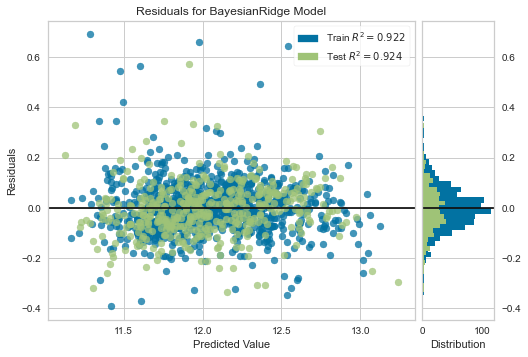

In [339]:
# Plot the tuned models
plot_model(tuned_model1)

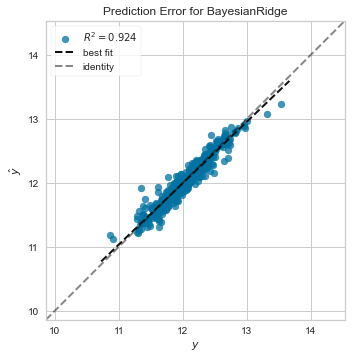

In [340]:
# Plot the Prediction Error 
plot_model(tuned_model1, plot = 'error')
# plot_model(tuned_model3, plot = 'error')

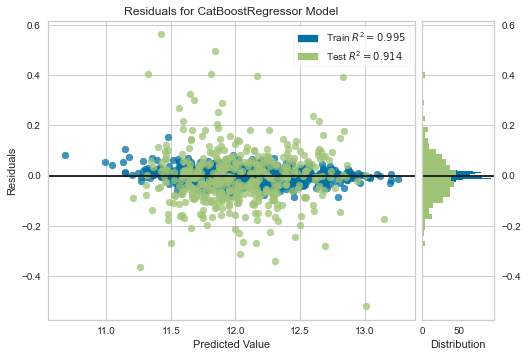

In [341]:
plot_model(tuned_model2)

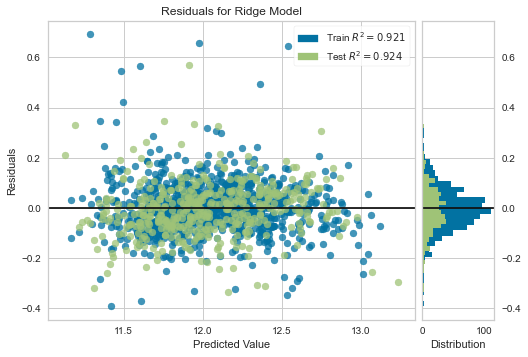

In [342]:
plot_model(tuned_model3)

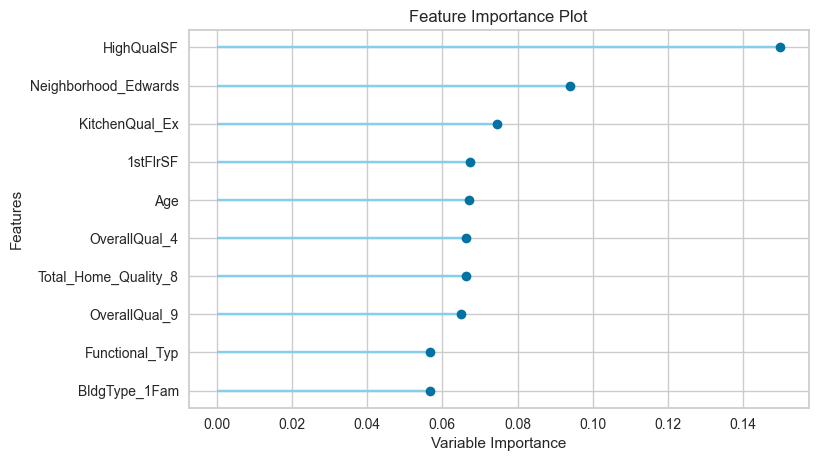

In [343]:
# Plot the Feature Importance
# Draw insight of which data are used most to arrive at the final prediction
plot_model(tuned_model1,'feature')

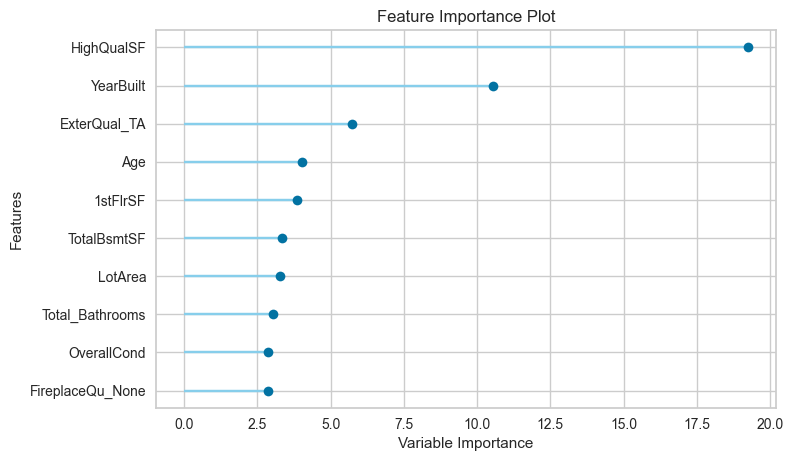

In [344]:
plot_model(tuned_model2,'feature')

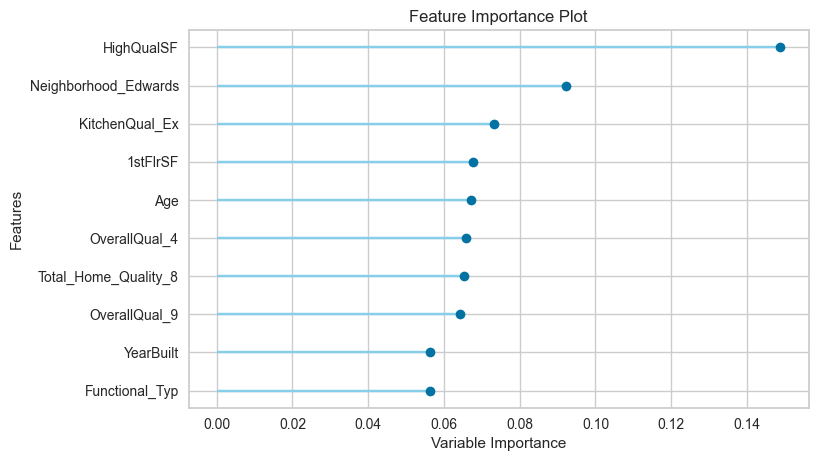

In [345]:
plot_model(tuned_model3,'feature')

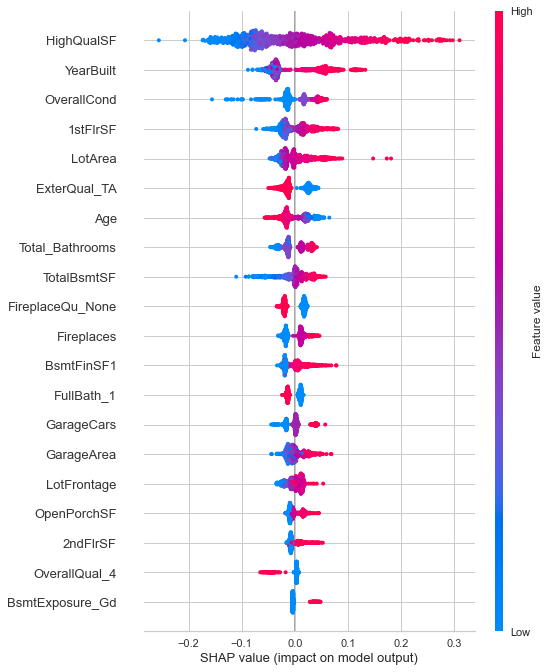

In [359]:
# Draw insight from the effect of the features on the final predcition (mainly for Catboost models)
# Less important features are not seen here
from catboost import Pool
import shap

train_pool = Pool(X_train_final)
explainer = shap.TreeExplainer(tuned_model2) # insert model
shap_values = explainer.shap_values(train_pool) # insert train Pool object
shap.initjs()

# The diagram represents each observation (x-axis) for the feature presented (y-axis)
# The x location of each dot on the x-axis reflects the impact of that feature on the models' prediction, while color of dot represent the value of that feature for that exact observation
shap.summary_plot(shap_values, X_train_final)

In [362]:
# Catboost comes with a great method: get_feature_importance
# that can be used to find important interactions among features, for feature engineering
# Huge Advantage because it can give us insights about possible new features to create that can improve the performance
interaction = tuned_model2.get_feature_importance(train_pool, type="Interaction")
column_names = X_train_final.columns.values 
interaction = pd.DataFrame(interaction, columns=["feature1", "feature2", "importance"])
interaction.feature1 = interaction.feature1.apply(lambda l: column_names[int(l)])
interaction.feature2 = interaction.feature2.apply(lambda l: column_names[int(l)])
interaction.head(20)

feature1              feature2  importance
0         YearBuilt            HighQualSF    1.113417
1           LotArea            HighQualSF    0.787080
2       OverallCond            HighQualSF    0.741240
3        BsmtFinSF1            HighQualSF    0.722777
4        Fireplaces            HighQualSF    0.709724
5       TotalBsmtSF            HighQualSF    0.638469
6       OverallCond             YearBuilt    0.616871
7        GarageArea            HighQualSF    0.601239
8          1stFlrSF            HighQualSF    0.551406
9           LotArea             YearBuilt    0.539505
10       MasVnrArea            HighQualSF    0.529210
11       HighQualSF                   Age    0.465227
12       HighQualSF  Total_Home_Quality_8    0.420521
13       HighQualSF          ExterQual_TA    0.410584
14      LotFrontage               LotArea    0.392258
15      LotFrontage            GarageArea    0.390495
16      OverallCond           TotalBsmtSF    0.379479
17  Total_Bathrooms            HighQualSF    0.373734
18          LotArea            GarageArea    0.363754
19      TotalBsmtSF                   Age    0.344085

In [348]:
# Create a blend model
blender = blend_models(estimator_list = [tuned_model1, tuned_model2, tuned_model3], return_train_score = True)

In [363]:
# # # Create a stack model
# stacker = stack_models(estimator_list = [tuned_model1, tuned_model2, tuned_model3], return_train_score = True)

In [350]:
# Return the best model (can be determined by 'R2' or 'MAE' or 'RMSE', ...)
best_RMSLE_model = automl(optimize = 'RMSLE')
best_RMSLE_model

BayesianRidge(alpha_1=0.08346912464085661, alpha_2=1.4278697022315527e-06,
              alpha_init=None, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=0.4160820577388501,
              lambda_2=5.538680945110065e-07, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [351]:
# Select the model with best RMSLE as the best model
best_model = best_RMSLE_model
best_model

BayesianRidge(alpha_1=0.08346912464085661, alpha_2=1.4278697022315527e-06,
              alpha_init=None, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=0.4160820577388501,
              lambda_2=5.538680945110065e-07, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [352]:
# Predict for the testing dataset
predictions = predict_model(best_model, data = new_test)
predictions.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  MasVnrArea  \
Id                                                                             
1461     4.394449  9.360741            5     1.945910       1961    0.000000   
1462     4.406719  9.565775            6     1.945910       1958    4.691348   
1463     4.317488  9.534668            5     1.791759       1997    0.000000   
1464     4.369448  9.208238            6     1.945910       1998    3.044522   
1465     3.784190  8.518392            8     1.791759       1992    0.000000   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_New  \
Id                                                    ...                 
1461    6.150603    4.976734   5.602119     6.783325  ...           0.0   
1462    6.828712    0.000000   6.008813     7.192934  ...           0.0   
1463    6.674561    0.000000   4.927254     6.834109  ...           0.0   
1464    6.401917    0.000000   5.783825     6.831954  ...           0.0   
1465    5.575949    0.000000   6.925595     7.155396  ...           0.0   

      SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
Id                                                                              
1461           0.0            1                    0.0                    0.0   
1462           0.0            1                    0.0                    0.0   
1463           0.0            1                    0.0                    0.0   
1464           0.0            1                    0.0                    0.0   
1465           0.0            1                    0.0                    0.0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
Id                                                                       
1461                   0.0                   0.0                     1   
1462                   0.0                   0.0                     1   
1463                   0.0                   0.0                     1   
1464                   0.0                   0.0                     1   
1465                   0.0                   0.0                     1   

      SaleCondition_Partial      Label  
Id                                      
1461                    0.0  11.666571  
1462                    0.0  11.973250  
1463                    0.0  12.112851  
1464                    0.0  12.180966  
1465                    0.0  12.074789  

[5 rows x 333 columns]

In [353]:
# Finalize the model 
final_model = finalize_model(best_model)

In [354]:
# Save the model
save_model(final_model, 'Final Blend Model (BR + CatBoost + RR) 27Jun2022')

# #　Load a saved model
# saved_final_lightgbm = load_model('Final Model (LGBM) 16Jun2022')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='SalePrice',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                        threshold=0.9)),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  BayesianRidge(alpha_1=0.08346912464085661,
                                alpha_2=1.4278697022315527e-06, alpha_init=None,
              

In [355]:
# Generating CSV file for Kaggle Submissions 
submission = pd.DataFrame({
        "Id": predictions.index,
        "SalePrice": np.expm1(predictions['Label'])
    })

submission.to_csv('HousePrice_model_submission.csv', index=False)

In [364]:
# # Generate logs - about the time used for compiling each function
# exp_logs = get_logs()
# exp_logs